<a href="https://colab.research.google.com/github/fatimabalig/codealpha_tasks/blob/main/Unemployment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error


In [ ]:
# Load the dataset
unemployment_data = pd.read_csv('/content/Unemployment_Rate_upto_11_2020.csv')

In [ ]:
# Inspect the dataset
print(unemployment_data.head())

           Region         Date  Frequency   Estimated Unemployment Rate (%)  \
0  Andhra Pradesh   31-01-2020          M                              5.48   
1  Andhra Pradesh   29-02-2020          M                              5.83   
2  Andhra Pradesh   31-03-2020          M                              5.79   
3  Andhra Pradesh   30-04-2020          M                             20.51   
4  Andhra Pradesh   31-05-2020          M                             17.43   

    Estimated Employed   Estimated Labour Participation Rate (%) Region.1  \
0             16635535                                     41.02    South   
1             16545652                                     40.90    South   
2             15881197                                     39.18    South   
3             11336911                                     33.10    South   
4             12988845                                     36.46    South   

   longitude  latitude  
0    15.9129     79.74  
1    15.9129

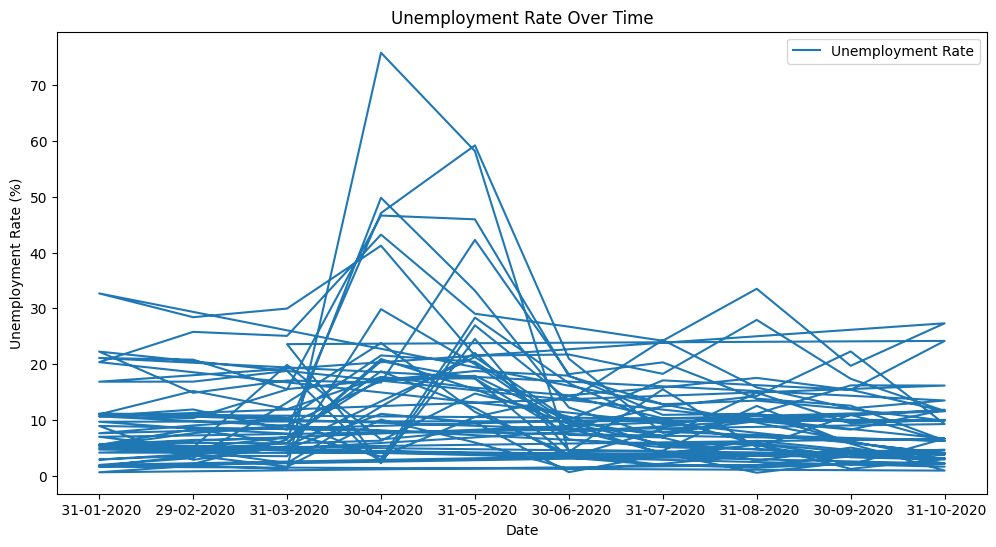

In [ ]:
# Plot unemployment rate over time
plt.figure(figsize=(12, 6))
plt.plot(unemployment_data[' Date'], unemployment_data[' Estimated Unemployment Rate (%)'], label='Unemployment Rate')
plt.xlabel('Date')
plt.ylabel('Unemployment Rate (%)')
plt.title('Unemployment Rate Over Time')
plt.legend()
plt.show()

In [ ]:
# Time Series Forecasting with ARIMA
# Split data into train and test sets
train = unemployment_data[' Estimated Unemployment Rate (%)'][:int(0.8*len(unemployment_data))]
test = unemployment_data[' Estimated Unemployment Rate (%)'][int(0.8*len(unemployment_data)):]


In [ ]:
# Fit ARIMA model
model = ARIMA(train, order=(1, 1, 1))  # You may need to tune the order
fitted_model = model.fit()

In [ ]:
# Forecast
forecast = fitted_model.forecast(steps=len(test))
mae = mean_absolute_error(test, forecast)
print("Mean Absolute Error:", mae)

Mean Absolute Error: 7.001832815503111


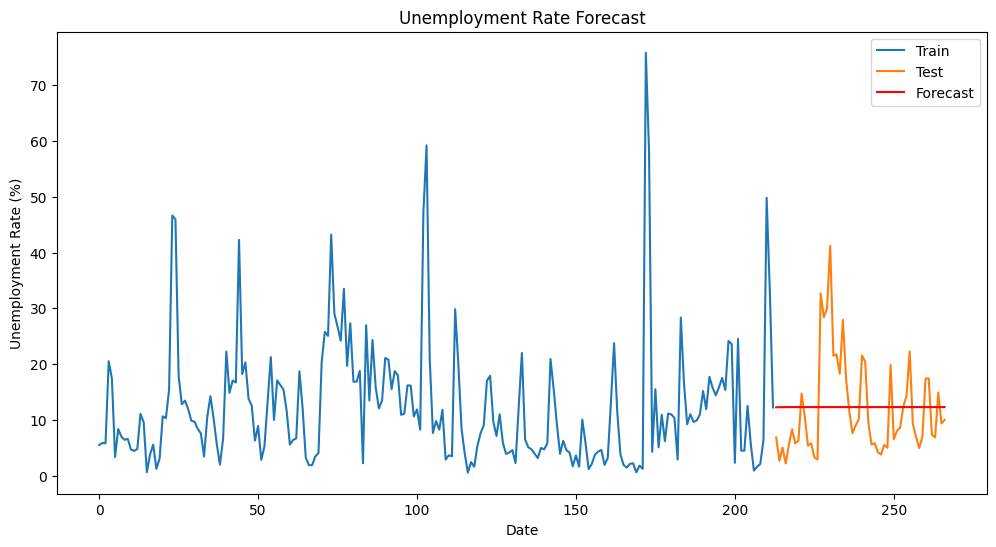

In [ ]:
# Plot forecast vs actual
plt.figure(figsize=(12, 6))
plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Test')
plt.plot(test.index, forecast, label='Forecast', color='red')
plt.xlabel('Date')
plt.ylabel('Unemployment Rate (%)')
plt.title('Unemployment Rate Forecast')
plt.legend()
plt.show()